In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
df = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585,0.006413


In [3]:
y = df["Incidencia"]
X = df.iloc[:,:-1]
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585


In [4]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 329)
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)
predicciones = clf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.018151470128259108
El error (rmse) de test es:  0.09499767581734966
R2:  0.736038877260647


## Pre - Pruning

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12,15,20,30],
         'min_samples_split': [2,3,4,10,20],
         'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,12,15]}

clf = DecisionTreeRegressor()
gscv = GridSearchCV(estimator=clf,param_grid=params)
gscv.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                              15],
                         'min_samples_split': [2, 3, 4, 10, 20]})

In [27]:
model = gscv.best_estimator_
model

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=4)

In [28]:

model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = y_train_pred,
        squared = False
       )
print("Std: ",std(y_train_pred))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2 train_pred: ",r2_score(y_train,y_train_pred))

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_test_pred,
        squared = False
       )
print("Std: ",std(y_test_pred))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2 test_pred: ",r2_score(y_test,y_test_pred))

Std:  0.013644323068003847
El error (rmse) de test es:  0.09467543885582187
R2 train_pred:  0.6985366520282694
Std:  0.015080688895026095
El error (rmse) de test es:  0.10271853913664952
R2 test_pred:  0.6391859974267422


## Post - Pruning

In [8]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 6.84934707e-17 9.36083817e-15 1.70631917e-14
 2.32906321e-14 3.40524438e-14 7.36527419e-14 8.90395193e-14
 1.01000213e-13 1.79855594e-13 2.02120696e-13 5.55883991e-13
 5.94071755e-13 8.96937762e-13 1.13439340e-12 2.67641232e-12
 2.97930052e-12 3.11668092e-12 4.53428941e-12 6.99272113e-12
 8.54615722e-12 8.62597878e-12 8.63285259e-12 1.45170960e-11
 1.73392859e-11 1.79539571e-11 1.87801773e-11 2.34120977e-11
 4.02646323e-11 4.58894409e-11 4.81332181e-11 6.97300264e-11
 8.02847461e-11 8.17570658e-11 1.28697729e-10 1.80371250e-10
 1.84750070e-10 2.67331021e-10 2.80412907e-10 2.99534613e-10
 3.01947874e-10 3.01952472e-10 3.57150608e-10 5.09167496e-10
 5.93674483e-10 7.22037066e-10 8.01572325e-10 8.20850369e-10
 1.01118430e-09 1.17829570e-09 1.19390842e-09 1.20547350e-09
 1.24345213e-09 1.43155185e-09 1.80337841e-09 1.81066098e-09
 1.89131495e-09 2.03879237e-09 2.09728742e-09 3.39332616e-09
 3.70107807e-09 4.28376046e-09 4.69760676e-09 4.73515862e-09
 5.20855805e-09 5.507859

In [9]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

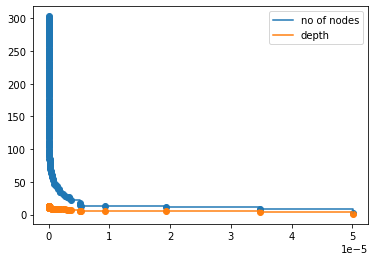

In [10]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

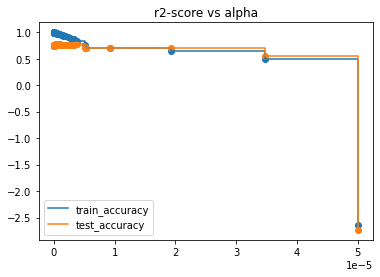

In [11]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(r2_score(y_train_pred,y_train))
    test_acc.append(r2_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('r2-score vs alpha')
plt.show()

In [12]:
clf_ = DecisionTreeRegressor(random_state=0,ccp_alpha=0.00000000)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {r2_score(y_train_pred,y_train)}')
print(f'Test score {r2_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.7528114728168201


In [13]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 6.84934707e-17 9.36083817e-15 1.70631917e-14
 2.32906321e-14 3.40524438e-14 7.36527419e-14 8.90395193e-14
 1.01000213e-13 1.79855594e-13 2.02120696e-13 5.55883991e-13
 5.94071755e-13 8.96937762e-13 1.13439340e-12 2.67641232e-12
 2.97930052e-12 3.11668092e-12 4.53428941e-12 6.99272113e-12
 8.54615722e-12 8.62597878e-12 8.63285259e-12 1.45170960e-11
 1.73392859e-11 1.79539571e-11 1.87801773e-11 2.34120977e-11
 4.02646323e-11 4.58894409e-11 4.81332181e-11 6.97300264e-11
 8.02847461e-11 8.17570658e-11 1.28697729e-10 1.80371250e-10
 1.84750070e-10 2.67331021e-10 2.80412907e-10 2.99534613e-10
 3.01947874e-10 3.01952472e-10 3.57150608e-10 5.09167496e-10
 5.93674483e-10 7.22037066e-10 8.01572325e-10 8.20850369e-10
 1.01118430e-09 1.17829570e-09 1.19390842e-09 1.20547350e-09
 1.24345213e-09 1.43155185e-09 1.80337841e-09 1.81066098e-09
 1.89131495e-09 2.03879237e-09 2.09728742e-09 3.39332616e-09
 3.70107807e-09 4.28376046e-09 4.69760676e-09 4.73515862e-09
 5.20855805e-09 5.507859

In [14]:
clf.fit(X_train, y_train)
predicciones = clf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.018151470128259108
El error (rmse) de test es:  0.09499767581734966
R2:  0.736038877260647


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

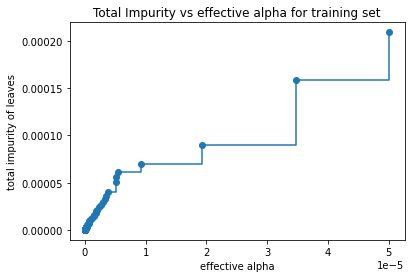

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 5.7346374535490244e-05


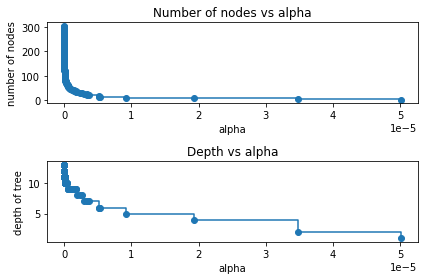

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

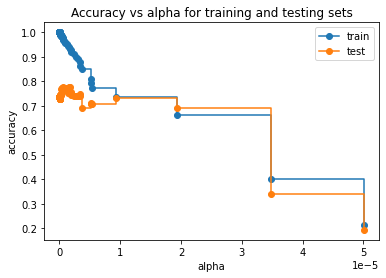

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

{'ccp_alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])}


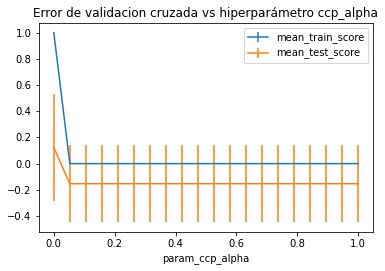

In [19]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 1, 20)}
print(param_grid)
# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 298
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [20]:
grid.best_params_ 

{'ccp_alpha': 0.0}

Profundidad del árbol: 13
Número de nodos terminales: 152


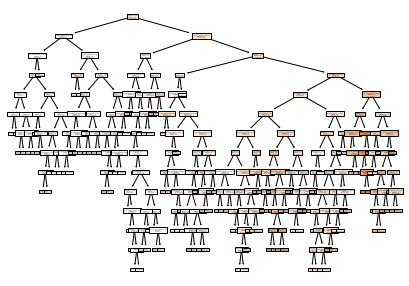

In [21]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [22]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.018412949321878806
El error (rmse) de test es:  0.08811736856756108
R2:  0.8045956965156803


In [23]:
clf_ = DecisionTreeRegressor(random_state=298,ccp_alpha=0.0000006)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)


rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_test_pred,
        squared = False
       )
print("Std: ",std(y_test_pred))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_test_pred))


Std:  0.018626445589477077
El error (rmse) de test es:  0.08690137504708005
R2:  0.8151605617358226


In [24]:
dd = pd.DataFrame()
dd['Valor'] = y_test
dd['Predicho'] = y_test_pred
dd

,Valor,Predicho
185,0.000331,0.008925
104,0.000019,0.000177
133,0.015998,0.038403
127,0.003098,0.003765
89,0.000458,0.001011
52,0.009609,0.014372
51,0.026507,0.030373
5,0.054916,0.069304
23,0.004864,0.000049
45,0.063856,0.069304


In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=13, random_state=298)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=13), n_estimators=150, random_state=298
)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_1,
        squared = False
       )
print("Std: ",std(y_1))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_1))

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_2,
        squared = False
       )
print("Std: ",std(y_2))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,y_2))

Std:  0.018412949321878806
El error (rmse) de test es:  0.08811736856756108
R2:  0.8045956965156803
Std:  0.016030600488527724
El error (rmse) de test es:  0.08101699760664346
R2:  0.8603655350182059
